## Exercise - Analyzing Data Science Job Demand

In [24]:
# Import Libraries
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

Using the latest cached version of the dataset since lukebarousse/data_jobs couldn't be found on the Hugging Face Hub
Found the latest cached dataset configuration 'default' at C:\Users\yanis\.cache\huggingface\datasets\lukebarousse___data_jobs\default\0.0.0\1d815e9ce232eb27db11939c44eb048fe6d2e9ab (last modified on Wed Feb 26 20:03:50 2025).


In [25]:
df_mex = df[df['job_country'] == 'Mexico'].copy()

In [26]:
# docs.python.org/3/library/datetime.html to get the codes of dt - %B gets you the month 

df_mex['job_posted_month'] = df_mex['job_posted_date'].dt.strftime('%B')

In [27]:
df_mex_pivot = df_mex.pivot_table(index='job_posted_month',columns='job_title_short',aggfunc='size')

In [28]:
df_mex_pivot

job_title_short,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
job_posted_month,,,,,,,,,,
April,95,22,159,287,168,22,15,57,30,79
August,131,23,310,332,288,25,27,62,44,101
December,185,67,294,450,305,63,31,90,69,282
February,79,39,145,254,161,26,20,57,25,144
January,99,36,355,459,281,28,31,118,60,111
July,117,29,254,360,255,32,38,54,38,94
June,113,15,230,436,234,35,25,96,28,61
March,87,36,156,224,162,34,14,61,28,139
May,51,7,156,271,186,18,29,50,21,25


In [29]:
df_mex_pivot.reset_index(inplace=True)
df_mex_pivot['month_no'] = pd.to_datetime(df_mex_pivot['job_posted_month'], format='%B').dt.month

df_mex_pivot

job_title_short,job_posted_month,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer,month_no
0,April,95,22,159,287,168,22,15,57,30,79,4
1,August,131,23,310,332,288,25,27,62,44,101,8
2,December,185,67,294,450,305,63,31,90,69,282,12
3,February,79,39,145,254,161,26,20,57,25,144,2
4,January,99,36,355,459,281,28,31,118,60,111,1
5,July,117,29,254,360,255,32,38,54,38,94,7
6,June,113,15,230,436,234,35,25,96,28,61,6
7,March,87,36,156,224,162,34,14,61,28,139,3
8,May,51,7,156,271,186,18,29,50,21,25,5
9,November,173,49,262,462,305,37,34,67,62,189,11


In [30]:
df_mex_pivot.sort_values('month_no', inplace=True)
df_mex_pivot.set_index('job_posted_month', inplace=True)

In [31]:
df_mex_pivot.drop(columns='month_no', inplace=True)

In [32]:
df_mex_pivot

job_title_short,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
job_posted_month,,,,,,,,,,
January,99,36,355,459,281,28,31,118,60,111
February,79,39,145,254,161,26,20,57,25,144
March,87,36,156,224,162,34,14,61,28,139
April,95,22,159,287,168,22,15,57,30,79
May,51,7,156,271,186,18,29,50,21,25
June,113,15,230,436,234,35,25,96,28,61
July,117,29,254,360,255,32,38,54,38,94
August,131,23,310,332,288,25,27,62,44,101
September,49,20,222,371,208,36,37,63,48,71


<Axes: xlabel='job_posted_month'>

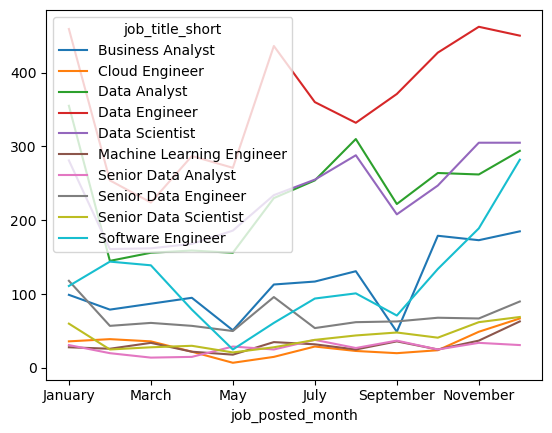

In [33]:
df_mex_pivot.plot(kind='line')

In [37]:
top_3 = df_mex['job_title_short'].value_counts().head(3)
top_3 = top_3.index.tolist()

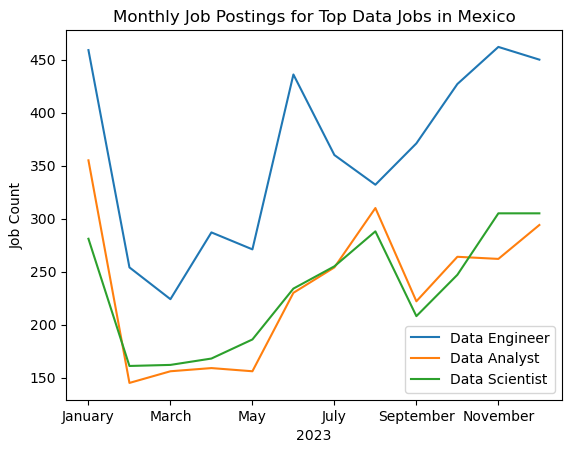

In [40]:
df_mex_pivot[top_3].plot(kind='line')
plt.title('Monthly Job Postings for Top Data Jobs in Mexico')
plt.xlabel('2023')
plt.ylabel('Job Count')
plt.legend()
plt.show()